In [1]:
#imports
import sys
sys.path.append('/home/harry/personal/uni/project/individual/harry/model')
from model import *

feature_names = [
    'is_summer', 'is_autumn', 'is_winter', 'is_spring',
    'is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday', 'is_saturday', 'is_sunday',
    'is_weekday', 'is_weekend',
    'is_jan', 'is_feb', 'is_mar', 'is_apr', 'is_may', 'is_jun', 'is_jul', 'is_aug', 'is_sep', 'is_oct', 'is_nov', 'is_dec',
    'min_30_min_demand',
    'avg_30_min_demand',
    'max_30_min_demand',
    'avg_temp',
    'max_temp',
    'min_temp',
    'hd_next_24h',
    'cd_next_24h'
]

Using device: cuda

Train Set Metrics:
MSE: 44405012.9108
MAE: 5024.6805
RMSE: 6663.7086
MAPE: 1.2755

Test Set Metrics:
MSE: 251619782.8211
MAE: 11534.4317
RMSE: 15862.5276
MAPE: 2.9895

Train Set Metrics:
MSE: 44405012.9108
MAE: 5024.6805
RMSE: 6663.7086
MAPE: 1.2755

Test Set Metrics:
MSE: 251619782.8211
MAE: 11534.4317
RMSE: 15862.5276
MAPE: 2.9895


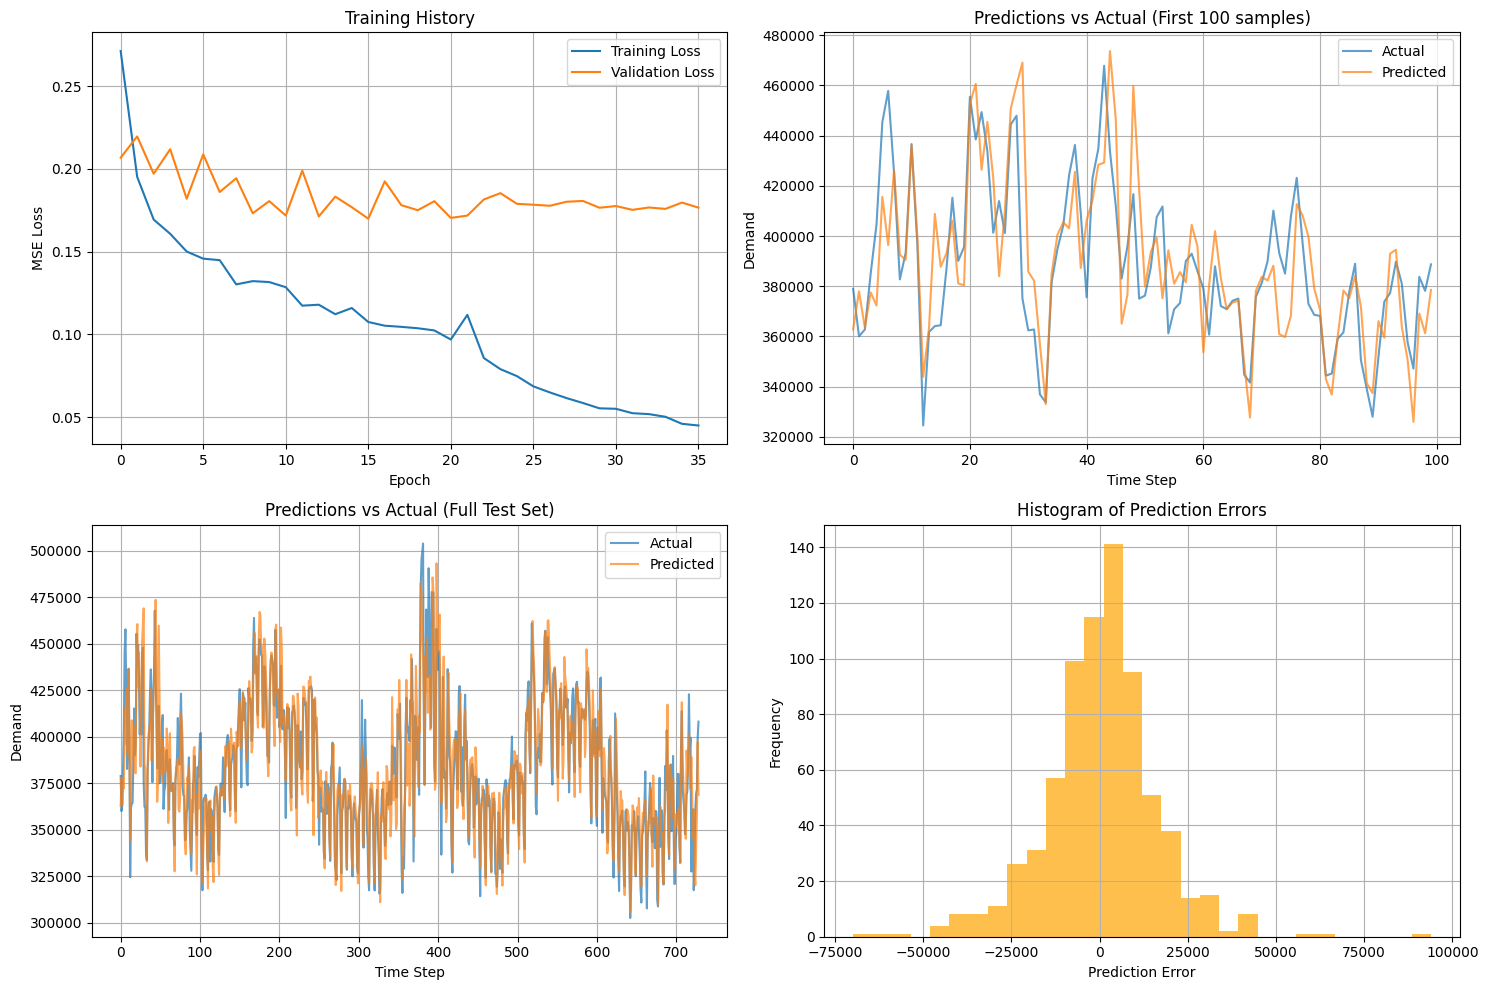

In [2]:
params = {
    'learning_rate': 0.001,
    'batch_size': 32,
    'seq_length': 7,
    'transformer_encoder_layer_params': {
        'd_model': 64,
        'nhead': 4,
        'dim_feedforward': 256,
        'dropout': 0.1,
        'activation': 'relu'
    },
    'transformer_layer_params': {
        'num_layers': 2,
    },
    'dataset': '2010-2019',
    'train_test_split': '80:20',
    'features': ['sum_30_min_demand'] + feature_names,
    'num_epochs': num_epochs,
    'patience': patience
}
train_model(params)


Using device: cuda

Train Set Metrics:
MSE: 43267523.1302
MAE: 4863.1656
RMSE: 6577.8053
MAPE: 1.2351

Test Set Metrics:
MSE: 258377845.2890
MAE: 11814.6183
RMSE: 16074.1359
MAPE: 3.0764

Train Set Metrics:
MSE: 43267523.1302
MAE: 4863.1656
RMSE: 6577.8053
MAPE: 1.2351

Test Set Metrics:
MSE: 258377845.2890
MAE: 11814.6183
RMSE: 16074.1359
MAPE: 3.0764


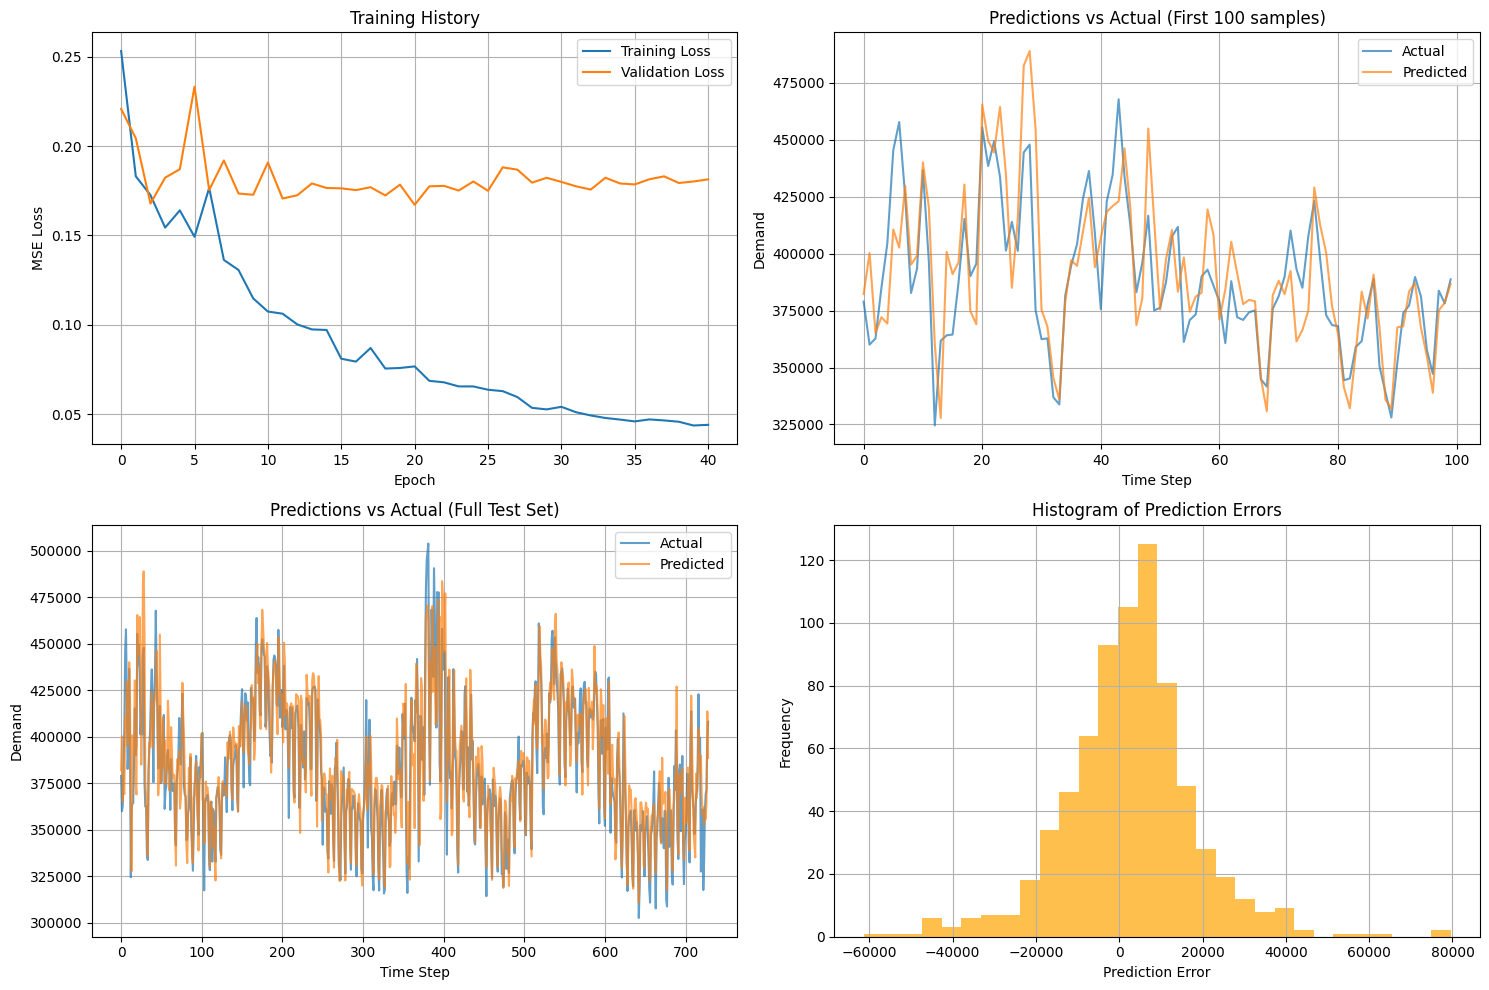

In [ ]:
params = {
    'learning_rate': 0.001,
    'batch_size': 32,
    'seq_length': 10,
    'transformer_encoder_layer_params': {
        'd_model': 64,
        'nhead': 4,
        'dim_feedforward': 296,
        'dropout': 0.1,
        'activation': 'relu'
    },
    'transformer_layer_params': {
        'num_layers': 3,
    },
    'dataset': '2010-2019',
    'train_test_split': '80:20',
    'features': ['sum_30_min_demand'] + feature_names,
    'num_epochs': num_epochs,
    'patience': patience,
    'visualise': True,
}
train_model(params)


Using device: cuda

Final Metrics:
MSE: 120297194.4288
MAE: 7631.3186
RMSE: 10968.0078
MAPE: 1.9388


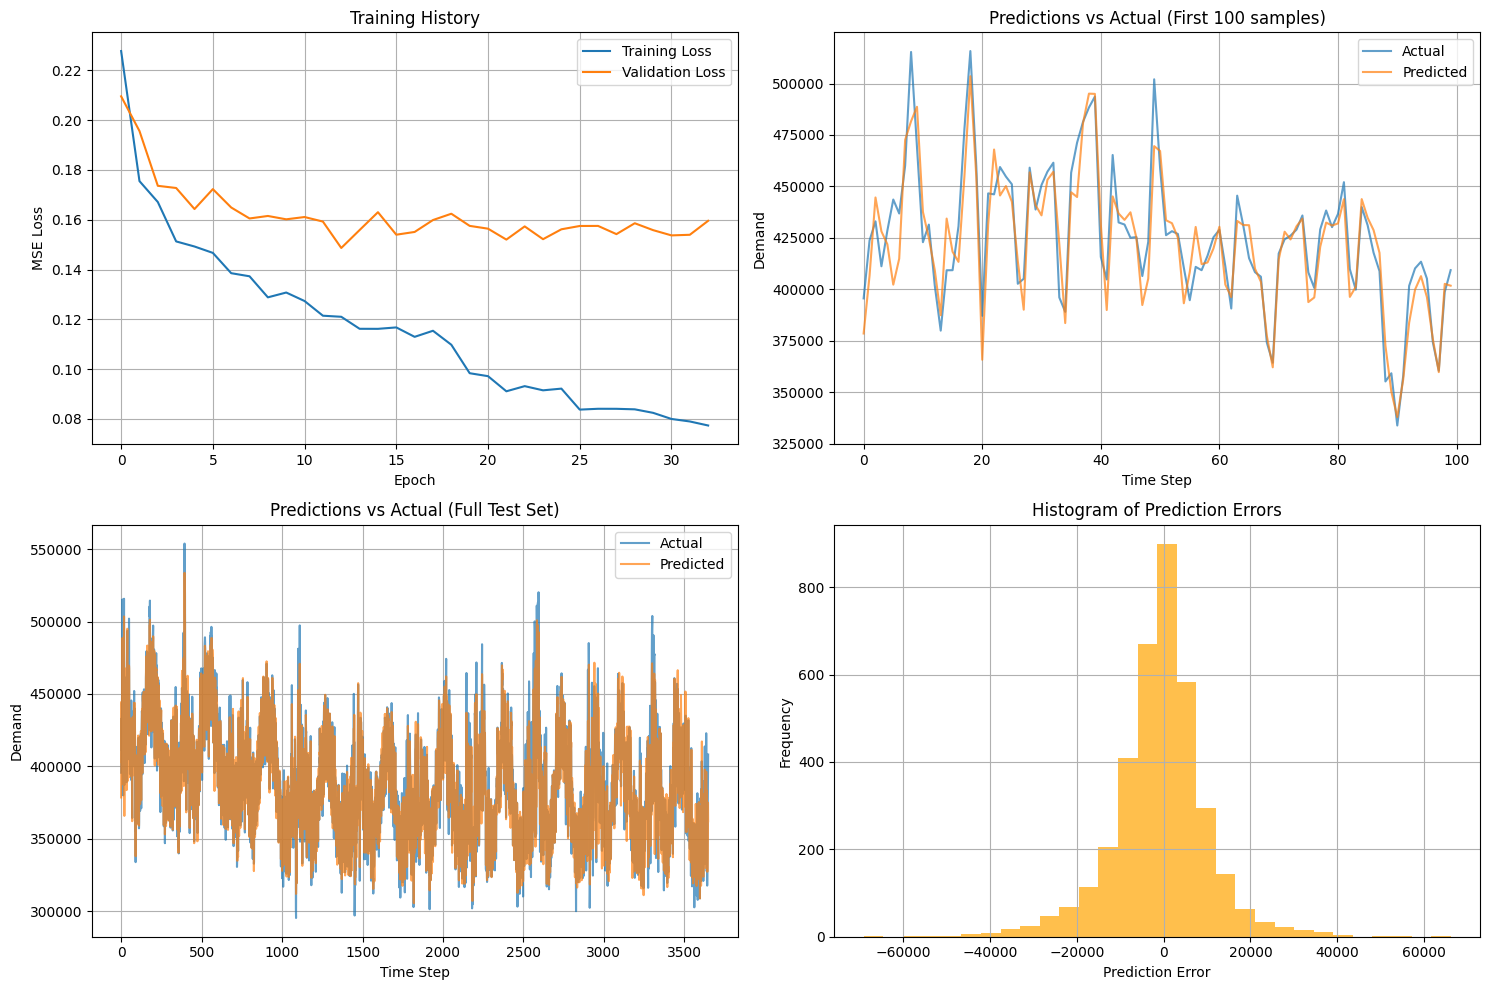

In [ ]:
params = {
    'learning_rate': 0.0004,
    'batch_size': 30,
    'seq_length': 3,
    'transformer_encoder_layer_params': {
        'd_model': 64,
        'nhead': 4,
        'dim_feedforward': 413,
        'dropout': 0.074,
        'activation': 'relu'
    },
    'transformer_layer_params': {
        'num_layers': 1,
    },
    'dataset': '2010-2019',
    'train_test_split': '80:20',
    'features': ['sum_30_min_demand'] + feature_names,
    'num_epochs': num_epochs,
    'patience': patience
}

input_dim = len(params['features'])

sequences, targets, datetimes, scaler_X = prepare_data(params)


model, train_losses, val_losses = train_transformer_model(
    sequences, targets, input_dim, datetimes, params
)

postprocess(model, sequences, targets, scaler_X, train_losses, val_losses, input_dim)


Using device: cuda

Train Set Metrics:
MSE: 19698944.2841
MAE: 3258.2722
RMSE: 4438.3493
MAPE: 0.8330

Test Set Metrics:
MSE: 291537371.5158
MAE: 12790.5884
RMSE: 17074.4655
MAPE: 3.3274

Train Set Metrics:
MSE: 19698944.2841
MAE: 3258.2722
RMSE: 4438.3493
MAPE: 0.8330

Test Set Metrics:
MSE: 291537371.5158
MAE: 12790.5884
RMSE: 17074.4655
MAPE: 3.3274


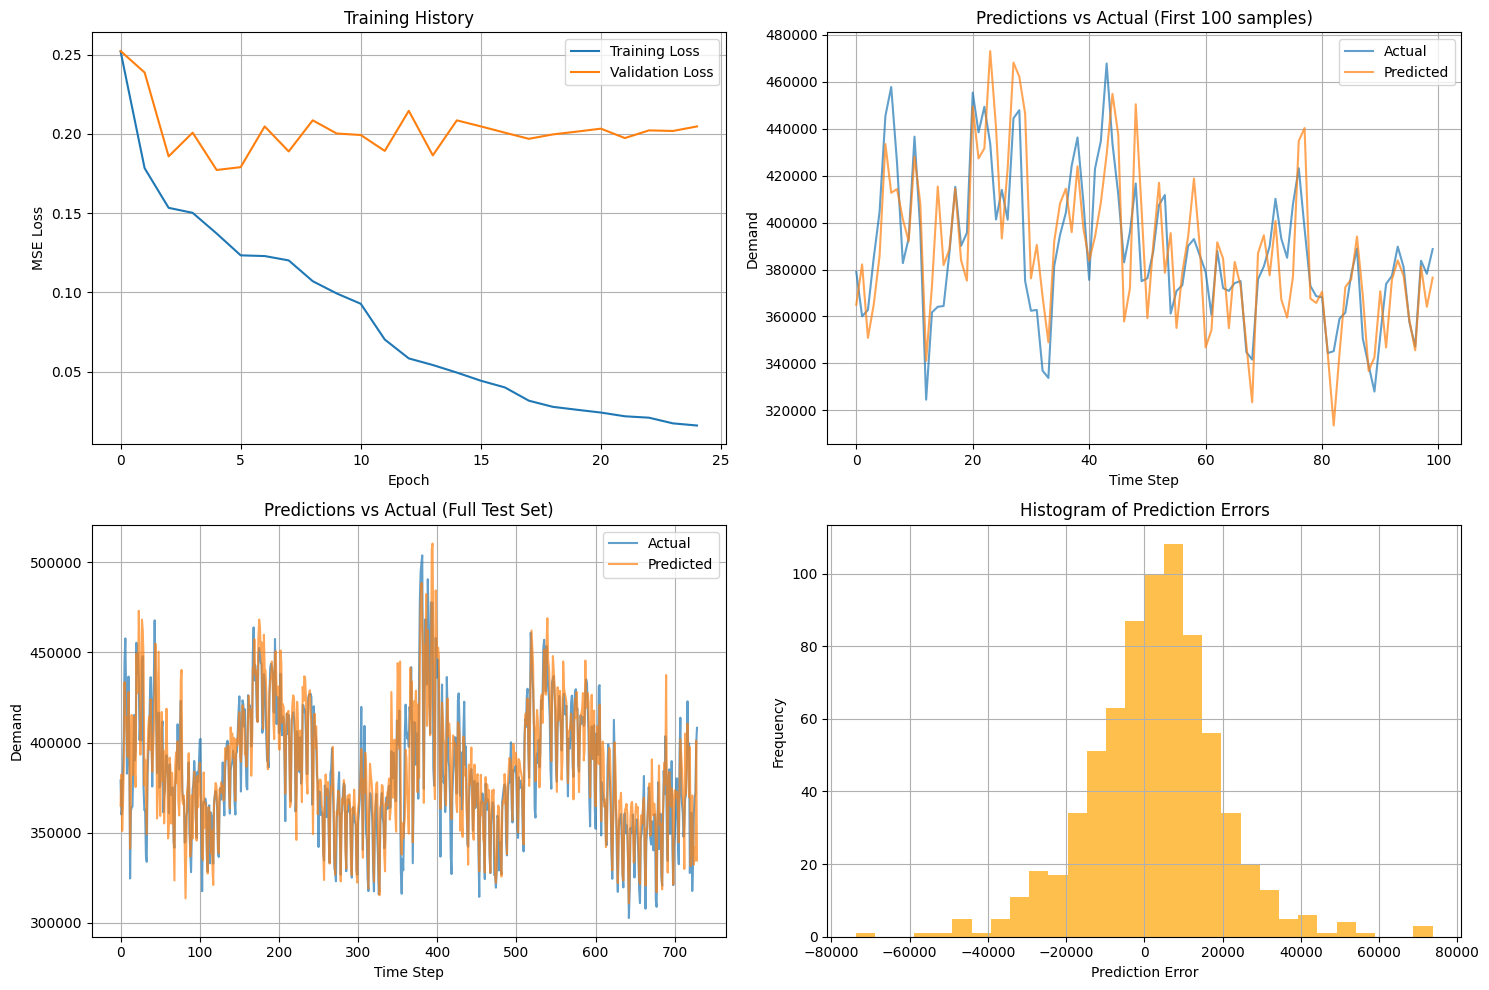

np.float64(12790.588430884014)

In [ ]:
# optuna best
params = {
    'learning_rate': 0.0007512730353889751,
    'batch_size': 20,
    'seq_length': 8,
    'transformer_encoder_layer_params': {
        'd_model': 64,
        'nhead': 4,
        'dim_feedforward': 233,
        'dropout': 0.0002455041090794075,
        'activation': 'relu'
    },
    'transformer_layer_params': {
        'num_layers': 3,
    },
    'dataset': '2010-2019',
    'train_test_split': '80:20',
    'features': ['sum_30_min_demand'] + feature_names,
    'num_epochs': num_epochs,
    'patience': patience
}
train_model(params)


In [ ]:
def comprehensive_overfitting_analysis(model, train_loader, val_loader, device):
    """Comprehensive analysis of potential overfitting"""
    model.eval()
    
    # Calculate metrics for both training and validation sets
    results = {}
    
    for dataset_name, loader in [('train', train_loader), ('val', val_loader)]:
        all_predictions = []
        all_targets = []
        
        with torch.no_grad():
            for batch_X, batch_y in loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                predictions = model(batch_X)
                
                all_predictions.append(predictions.cpu().numpy())
                all_targets.append(batch_y.cpu().numpy())
        
        # Concatenate all batches
        predictions = np.concatenate(all_predictions)
        targets = np.concatenate(all_targets)
        
        # Calculate multiple metrics
        mape = np.mean(np.abs((targets - predictions) / targets)) * 100
        mse = np.mean((targets - predictions) ** 2)
        mae = np.mean(np.abs(targets - predictions))
        
        results[dataset_name] = {
            'mape': mape,
            'mse': mse, 
            'mae': mae,
            'predictions': predictions,
            'targets': targets
        }
    
    # Calculate performance gap
    mape_gap = results['train']['mape'] - results['val']['mape']
    mse_gap = results['train']['mse'] - results['val']['mse']
    
    print("=== OVERFITTING ANALYSIS ===")
    print(f"Training MAPE: {results['train']['mape']:.4f}%")
    print(f"Validation MAPE: {results['val']['mape']:.4f}%")
    print(f"MAPE Gap (Train - Val): {mape_gap:.4f}%")
    print(f"MSE Gap (Train - Val): {mse_gap:.6f}")
    
    # Rule of thumb: if validation performance is significantly worse (>20-30% relative difference)
    val_mape_ratio = results['val']['mape'] / results['train']['mape']
    if val_mape_ratio > 1.3:
        print("🚨 WARNING: Potential overfitting detected!")
    elif val_mape_ratio > 1.1:
        print("⚠️  Caution: Slight overfitting possible")
    else:
        print("✅ Good generalization: Train/Val performance is similar")
    
    return results

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
comprehensive_overfitting_analysis(model, sequences, targets, device)

ValueError: too many values to unpack (expected 2)

In [3]:
# optuna best
params = {
    'learning_rate': 0.0007512730353889751,
    'batch_size': 20,
    'seq_length': 8,
    'transformer_encoder_layer_params': {
        'd_model': 64,
        'nhead': 4,
        'dim_feedforward': 233,
        'dropout': 0.0002455041090794075,
        'activation': 'relu'
    },
    'transformer_layer_params': {
        'num_layers': 3,
    },
    'dataset': '2010-2019',
    'train_test_split': '80:20',
    'features': ['sum_30_min_demand'] + feature_names,
    'num_epochs': num_epochs,
    'patience': patience
}

input_dim = len(params['features'])

sequences, targets, datetimes, scaler_X = prepare_data(params)


model, train_losses, val_losses = train_transformer_model(
    sequences, targets, input_dim, datetimes, params
)

postprocess(model, sequences, targets, scaler_X, train_losses, val_losses, input_dim, visualise=True)


Using device: cuda


ValueError: Found array with 0 sample(s) (shape=(0, 34)) while a minimum of 1 is required.